# Reconstruction of DOSY NMR signals

## 2-Generation of synthetic data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [3]:
sign = np.loadtxt("x.txt")
N = len(sign)
T = []
for i in range(N):
    T.append(np.exp((-i-1+1)*np.log(1/1000)/199))
T

[1.0,
 1.0353218432956621,
 1.0718913192051278,
 1.109752496412072,
 1.1489510001873091,
 1.1895340673703196,
 1.2315506032928256,
 1.275051240713013,
 1.3200884008314178,
 1.3667163564620064,
 1.414991297434576,
 1.4649713983072858,
 1.5167168884709228,
 1.5702901247293772,
 1.625755666443794,
 1.6831803533309568,
 1.7426333860096501,
 1.8041864093920723,
 1.8679135990207825,
 1.9338917504552309,
 2.0022003718155843,
 2.0729217795953714,
 2.1461411978584044,
 2.2219468609395236,
 2.300430119772918,
 2.381685551976158,
 2.465811075822603,
 2.552908068239517,
 2.643081486974105,
 2.7364399970746707,
 2.8330961018393244,
 2.9331662783900443,
 3.036771118035458,
 3.1440354715914998,
 3.255088599835058,
 3.3700643292719286,
 3.4891012134067725,
 3.6123426997094312,
 3.739937302478797,
 3.8720387818125555,
 4.008806328898465,
 4.150404757850475,
 4.297004704320841,
 4.448782831127585,
 4.6059220411451065,
 4.768611697714469,
 4.937047852839003,
 5.111433483440167,
 5.291978735958441,
 5.478

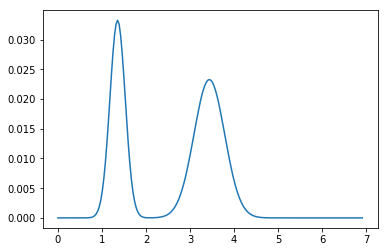

In [4]:
#Displaying the original signal as a function of T
plt.plot(np.log(T), sign)

In [5]:
#Creating t
t = []
M = 50
tmin = 0 
tmax = 1.5

for m in range(M):
    t.append(tmin+(m/(M-1)*tmax))
t

[0.0,
 0.030612244897959183,
 0.061224489795918366,
 0.09183673469387754,
 0.12244897959183673,
 0.15306122448979592,
 0.18367346938775508,
 0.21428571428571427,
 0.24489795918367346,
 0.2755102040816327,
 0.30612244897959184,
 0.336734693877551,
 0.36734693877551017,
 0.3979591836734694,
 0.42857142857142855,
 0.45918367346938777,
 0.4897959183673469,
 0.5204081632653061,
 0.5510204081632654,
 0.5816326530612245,
 0.6122448979591837,
 0.6428571428571428,
 0.673469387755102,
 0.7040816326530612,
 0.7346938775510203,
 0.7653061224489797,
 0.7959183673469388,
 0.8265306122448979,
 0.8571428571428571,
 0.8877551020408163,
 0.9183673469387755,
 0.9489795918367347,
 0.9795918367346939,
 1.010204081632653,
 1.0408163265306123,
 1.0714285714285714,
 1.1020408163265307,
 1.1326530612244898,
 1.163265306122449,
 1.193877551020408,
 1.2244897959183674,
 1.2551020408163267,
 1.2857142857142856,
 1.316326530612245,
 1.346938775510204,
 1.3775510204081634,
 1.4081632653061225,
 1.4387755102040816,


In [6]:
#Constructing matrix K
K = np.zeros((M, N))
for j in range(M):
    
    for i in range(N):
        
        
        K[j,i] = np.exp(-T[i]*t[j])
K   

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.69851565e-01, 9.68803450e-01, 9.67719507e-01, ...,
        3.95314811e-13, 1.44159827e-13, 5.07307125e-14],
       [9.40612058e-01, 9.38580124e-01, 9.36481044e-01, ...,
        1.56273800e-25, 2.07820558e-26, 2.57360519e-27],
       ...,
       [2.37218052e-01, 2.25463789e-01, 2.13907633e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30066299e-01, 2.18430097e-01, 2.07002589e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.23130160e-01, 2.11615831e-01, 2.00320443e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

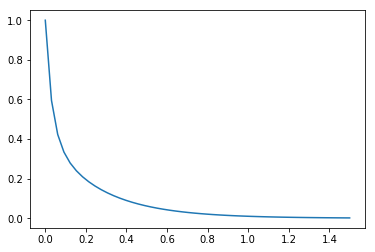

In [7]:
#Simulation of the noisy data
np.random.seed(32)
noise = np.random.normal(0,(0.01*np.dot(K,sign))**2)
y = np.dot(K,sign) + noise 
plt.plot(t,y)

## 3-Comparison of regularization strategies

### Smoothness prior

$(\forall x \in \mathbb{R}^{\mathbb{N}})\; g(x) = \frac{1}{2}||Dx||^2$

The cost function is differentiable :

__First differenciation__:
$$K^T(Kx - y) + \beta D^TDx$$

__Second differenciation__ : 
$$K^TK + \beta D'D$$

This hessian matrix is positive semi definite, the problem is convex, to find a closed form solution we must show that : $||Kx||^2 + \beta ||Dx||^2 $ is invertible.

Let's consider $x$ such that $||Kx||^2 + \beta ||Dx||^2  = 0$, then we must have:
$$Dx = O$$
$$\forall k, \, x^k-x^{k-1} = 0$$
then there exists $\alpha$ such that $$x = \alpha (1, 1,...,1)$$
$$x \notin zer(K)$$
Then the matrix is invertible (positive definite).

In [8]:
#Computing D
D= np.zeros((N,N))
for i in range(N):
    if i == 0:
        D[i][i] =1
        D[i][N-1] = -1
    else:
        D[i][i]=1
        D[i][i-1]= -1

In [9]:
#Closed form solution
b = 0.1
x = np.dot(np.dot((np.dot(K.T,K)+b*np.dot(D.T,D)),K.T),y)

In [10]:
#Computing normalized quadratic error 
def calc_error(b,K,D,y):
    x = np.dot(np.dot(np.linalg.inv(np.dot(K.T,K)+b*np.dot(D.T,D)),K.T),y)
    e = np.linalg.norm(x - sign)**2/np.linalg.norm(sign)**2
    print('For beta ={0}'.format(b))
    print('The normalized quadratic error is :{0}'.format(e))
    return e 

In [11]:
#beta tuning
from sklearn.model_selection import ParameterGrid
param_grid = {'b': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]}

grid = ParameterGrid(param_grid)

for params in grid:
    calc_error(params['b'],K,D,y)

For beta =1
The normalized quadratic error is :0.2752291529420403
For beta =0.1
The normalized quadratic error is :0.13763181559731255
For beta =0.01
The normalized quadratic error is :0.12943023565230405
For beta =0.001
The normalized quadratic error is :0.12796689276109505
For beta =0.0001
The normalized quadratic error is :0.10888894241174002
For beta =1e-05
The normalized quadratic error is :0.057866494084898
For beta =1e-06
The normalized quadratic error is :0.20326874030463551


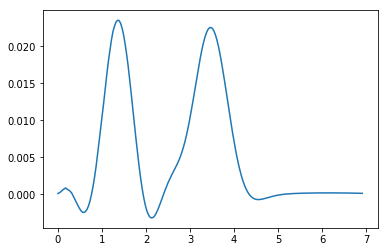

In [12]:
b=0.00001
xs = np.dot(np.dot(np.linalg.inv(np.dot(K.T,K)+b*np.dot(D.T,D)),K.T),y)

#Displaying the restored signal as a function of T
plt.plot(np.log(T), xs)

### Smoothness prior + constraints

In this case the indicator function is not differentiable, we will use the projected Forward Backward algorithm to find a minimizer. 

In [13]:
def gradient_descent(init, steps,relax, grad, proj=lambda x: x):
    """Projected gradient descent.
    
    Inputs:
        initial: starting point
        steps: list of scalar step sizes
        relax : list of scalar relaxations
        grad: function mapping points to gradients
        proj (optional): function mapping points to points
        
    Returns:
        List of all points computed by projected gradient descent.
    """
    xs = init
    for step in steps:
        ys = xs - step * grad(xs)
        xs = xs + relax * (proj(ys) - xs) 
    return ys

In [14]:
x0 = np.random.sample(N)
b = 0.00001

In [15]:
def gradient(K, D, b, x, y):
    return np.dot(K.T,np.dot(K,x) - y) + b * np.dot(D.T,np.dot(D,x))

def project(x, xmin, xmax):
    return np.clip(x,xmin,xmax)

xmin = min(sign)
xmax = max(sign)
grad = lambda x : gradient(K,D,b,x,y)
proj = lambda x : project(x, xmin, xmax)

In [296]:
xs = gradient_descent(x0,[0.01]*100000,0.3,grad, proj)

In [297]:
e = np.linalg.norm(xs - sign)**2/np.linalg.norm(sign)**2
e

0.0785491895017635

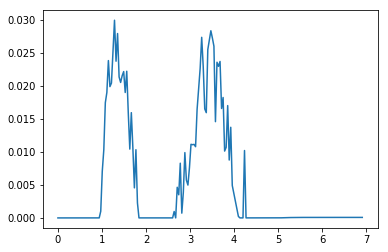

In [298]:
#Displaying the restored signal as a function of T
plt.plot(np.log(T), xs)

### Sparsity prior

The problem is still convex, we also need to compute the forward backward algorithm to find a minimizer.

In [16]:
#calculate proxf
def proxlf(x,l):
    prox =  np.sign(x)*np.maximum(abs(x) - l,0)
    return prox

#Computing the gradient 
def gradient2(K,x, y):
    return np.dot(K.T,np.dot(K,x) - y)

gam = 0.01
b=0.1
l = b * gam

grad = lambda x : gradient2(K,x,y)
prox = lambda x : proxlf(x,l)

In [17]:
xs = gradient_descent(x0,[gam]*100000,0.3,grad,prox)

In [18]:
e = np.linalg.norm(xs - sign)**2/np.linalg.norm(sign)**2
e

1.6551164016922932

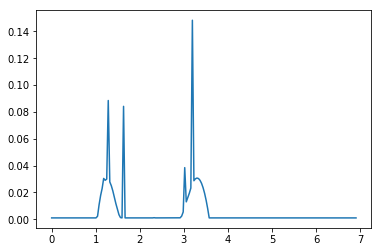

In [19]:
#Displaying the restored signal as a function of T
plt.plot(np.log(T), xs)

## Part II - Maximum entropy regularization

1- ent is convex,proper, lower-semicontinuous as a sum of functions that are convex, proper and lower-semicontinuous.
It is not differentiable. 

2-The optimization problem has a solution as it implies functions in $\Gamma_0$, it is not necessarily unique.

3-$x \in \mathbb{R}$ , $prox_{\gamma \phi(x)} = argmin \frac{1}{2} ||x - z||^2 + \gamma z ln(z)$
$$\frac{z-x}{\gamma} + 1 + ln(z) = 0 $$
$$\frac{z}{\gamma} + ln(frac{z}{\gamma}) = \frac{x}{\gamma} - 1 - ln(\gamma)$$
$$\frac{z}{\gamma} e^{\frac{z}{\gamma}} = e^{\frac{x}{\gamma}} - 1 - ln(\gamma)$$
$$z = \gamma W(\frac{1}{\gamma}e^{(\frac{x}{\gamma}-1)})$$

In [168]:
#Proximity function of ent with Lambert function 
import scipy.special.lambertw as lambertw

In [169]:
def proxent(gamma,N, x):
    s = np.zeros(N)
    for i in range(N):
        v=np.zeros(N)
        v[i] = 1
        xs = x[i]
        u = xs/gamma -1 - log(gamma)
        if u >100:
            p =gamma*( u - log(u))
        elif u < -20:
            p = 0
        else:
            p = gamma * lambertw(u)
        q = p * v
        s = s + q
    return s

In [170]:
#Computing the gradient 
def gradient2(K,x, y):
    return np.dot(K.T,np.dot(K,x) - y)

In [290]:
#Forward Backward 
gam = 0.01
b=0.000001
l = b * gam
prox = lambda x : proxent(l, N, x)
grad = lambda x : gradient2(K,x,y)

In [291]:
xs = gradient_descent(x0,[gam]*10000,0.3,grad,prox)

C:\Users\Arthur\Python_Projects\Python3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [292]:
e = np.linalg.norm(xs - sign)**2/np.linalg.norm(sign)**2
e

0.1216943893766176

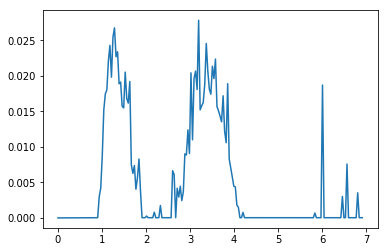

In [293]:
#Displaying the restored signal as a function of T
plt.plot(np.log(T), xs)

In [294]:
#Douglas Rachford 
Id = np.eye(N,N)

In [202]:
def prox_q(x,K,y,l):
    prox = np.dot(np.linalg.inv(Id+np.dot(K.T,K)*l),x+l*np.dot((K.T),y))
    return prox

In [203]:
def d_r(init, steps,relax, proj=lambda x: x, proj1 = lambda x: x):
   
    xs = init
    for step in steps:
        ys = proj(xs)
        zs = proj1(2*ys-xs)
        xs = xs + relax * (zs - ys) 
        #print(zs-ys)
    return ys

In [286]:
gam = 0.01
b = 0.000001
l = gam * b
proxa = lambda x : prox_q(x,K,y,gam)
prox = lambda x : proxent(l,N,x)

In [287]:
xs = d_r(x0,[gam]*10000,0.3,prox, proxa)

C:\Users\Arthur\Python_Projects\Python3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [288]:
er = np.linalg.norm(xs - sign)**2/np.linalg.norm(sign)**2
er

0.19423609923387092

C:\Users\Arthur\Python_Projects\Python3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


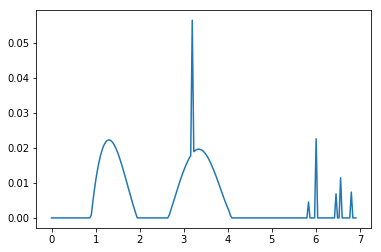

In [289]:
#Displaying the restored signal as a function of T
plt.plot(np.log(T), xs)

In [249]:
#Find the best beta
def calc_error2(b, gam, relax, K,x0,y):
    l = b* gam
    grad = lambda x : gradient2(K,x,y)
    proxa = lambda x : prox_q(x,K,y,gam)
    prox = lambda x : proxent(l,N,x)
    xsfw = gradient_descent(x0,[gam]*10000,relax,grad,prox)
    xsdr = d_r(x0,[gam]*10000,relax,prox, proxa)
    erfw = np.linalg.norm(xsfw - sign)**2/np.linalg.norm(sign)**2
    erdr = np.linalg.norm(xsdr - sign)**2/np.linalg.norm(sign)**2
    print('For beta ={0}'.format(b))
    print('The normalized quadratic error for FW is :{0}'.format(erfw))
    print('The normalized quadratic error for DR is :{0}'.format(erdr))
    return (erfw,erdr)

In [250]:
param_grid = {'b': [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]}
grid = ParameterGrid(param_grid)

for params in grid:
    calc_error2(params['b'],0.01,0.3, K, x0, y)

For beta =10
The normalized quadratic error for FW is :54.678732882581194
The normalized quadratic error for DR is :22.269722208671293


C:\Users\Arthur\Python_Projects\Python3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


For beta =1
The normalized quadratic error for FW is :2.331688527633098
The normalized quadratic error for DR is :1.080211037690296
For beta =0.1
The normalized quadratic error for FW is :1.5573143583095
The normalized quadratic error for DR is :5.24839763154327
For beta =0.01
The normalized quadratic error for FW is :2.5191146903787254
The normalized quadratic error for DR is :21.736247212752104
For beta =0.001
The normalized quadratic error for FW is :0.42203201996230627
The normalized quadratic error for DR is :4.018819582453165
For beta =0.0001
The normalized quadratic error for FW is :0.3107026543761809
The normalized quadratic error for DR is :1.833448107122619
For beta =1e-05
The normalized quadratic error for FW is :0.12320952176037268
The normalized quadratic error for DR is :0.22796725033216844
For beta =1e-06
The normalized quadratic error for FW is :0.1216943893766176
The normalized quadratic error for DR is :0.19423609923387092


6- The best choice for beta in term of reconstruction error seems to be $ \beta = 10^{-6}$

7-The errors obtained using the maximum entropy regularization were found to be lower than using the previous regularizations functions. Although the plots show peaks which were absent in the previous plots for higher values of T.

### PPXA algorithm

Now we try to minimize ent(x) with $Kx$ in the Ball : $B(y,\sigma \sqrt{M \eta})$

With Moreau decomposition, we find that it is equivalent to solving :
$$argmin \frac{1}{2}||Kx-y||^2 + \sigma \sqrt{M \eta} ||Kx||^2$$

In [251]:
eta = 1
L = np.dot(np.linalg.inv(np.dot(K.T,K)+ Id * 2 * 0.01* np.sqrt(M*eta)),K.T)

In [295]:
def PPXA(init, L, steps,relax, proj=lambda x: x):
    xs = init
    vs = np.dot(np.linalg.inv(np.dot(L.T,L)),np.dot(L.T,xs))
    for step in steps:
        for i in range(m):
            ys = proj(xs)
            cs = np.dot(np.linalg.inv(np.dot(L.T,L)),np.dot(L.T,ys))
            xs = xs + relax * (np.dot(L,(2*cs - vs))-ys )
            vs = vs + relax * (cs-vs)
    return vs

In [316]:
gam = 0.01
prox = lambda x : proxent(gam,N,x)

xs = PPXA(x0, L , [gam]*100,0.2, prox)

C:\Users\Arthur\Python_Projects\Python3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [317]:
xspp = np.dot(L,xs)

In [318]:
er = np.linalg.norm(xspp - sign)**2/np.linalg.norm(sign)**2
er

nan